In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [414]:
train_file=r"train_log.csv"
train_data=pd.read_csv(train_file)
train_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,male,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,female,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,female,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,female,18.0,1,0,14.4583


C:\Users\Ishaan Verma\AppData\Local\Temp\ipykernel_12924\415000910.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data=train_data.drop('Name',axis=1).replace("male",1).replace("female",0)


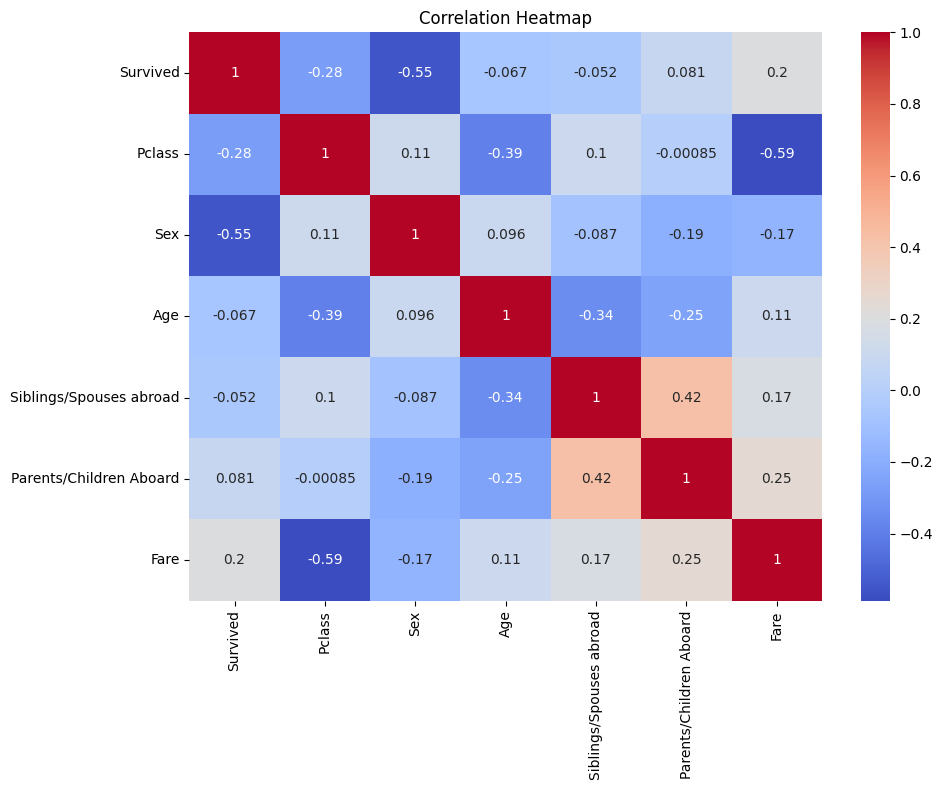

In [415]:
train_data=train_data.drop('Name',axis=1).replace("male",1).replace("female",0)
feature_names = ['Survived', 'Pclass','Sex','Age','Siblings/Spouses abroad',
                 'Parents/Children Aboard','Fare']  
# Calculate correlation matrix
corr_matrix = np.corrcoef(train_data, rowvar=False)

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True,
            xticklabels=feature_names,
            yticklabels=feature_names)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [416]:
X_train=train_data.drop('Survived',axis=1).drop('Fare',axis=1)
X_train=X_train.replace("male",1).replace("female",0).values.T
print(X_train.shape)
Y_train=train_data.Survived.values.reshape(X_train.shape[1],1).T
print(Y_train.shape)

(5, 577)
(1, 577)


In [417]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def accuracy(X,Y,W,B):
    Z=(np.dot(W.T,X))+B
    A=sigmoid(Z)
    A=A>0.5
    A=np.array(A,dtype='int64')
    acc=(1-np.sum(np.absolute(A-Y)/Y.shape[1]))*100
    return acc
    
def model(X_train,Y_train,iterations,alpha):
    n=X_train.shape[0]
    m=X_train.shape[1]
    W=np.zeros((n,1))
    B=0
    cost_list=[]
    for i in range(iterations):
        Z=(np.dot(W.T,X_train))+B
        A=sigmoid(Z)
        cost=-(1/m)*np.sum((Y_train*np.log(A))+((1-Y_train)*np.log(1-A)))
        dW=(1/m)*np.dot((A-Y_train),X_train.T)
        dB=(1/m)*np.sum(A-Y_train)
        W=W-alpha*(dW.T)
        B=B-alpha*dB
        cost_list.append(cost)
        if(i%(iterations/10)==0):
            print("cost at ",i," iteration is: ",cost)   
    print("Final cost value at ",i," iteration is:", cost)         
    return A,W,B,cost_list
iterations=10000
alpha=0.004
y_pred,weights,B,cost_list=model(X_train,Y_train,iterations,alpha)
print("Training Acuuracy: ", accuracy(X_train,Y_train,weights,B)," %")

cost at  0  iteration is:  0.6931471805599453
cost at  1000  iteration is:  0.6032770724906965
cost at  2000  iteration is:  0.5735523790665569
cost at  3000  iteration is:  0.5538607156252069
cost at  4000  iteration is:  0.5400125065552752
cost at  5000  iteration is:  0.5298797620978142
cost at  6000  iteration is:  0.522209734563617
cost at  7000  iteration is:  0.5162194861472928
cost at  8000  iteration is:  0.5114026569418573
cost at  9000  iteration is:  0.5074237961094725
Final cost value at  9999  iteration is: 0.504059531579927
Training Acuuracy:  80.06932409012131  %


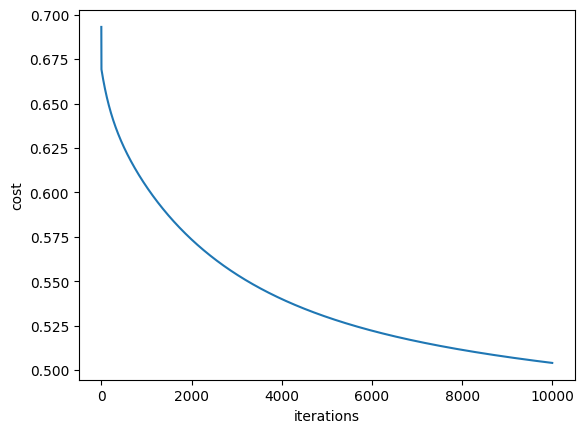

In [418]:
rng = np.arange(0,iterations)
plt.plot(rng,cost_list)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [419]:
#TESTING THE MODEL
test_file=r"test_log.csv"
test_data=pd.read_csv(test_file)
test_data=test_data.drop('Name',axis=1).replace("male",1).replace("female",0)

X_test=test_data.drop('Survived',axis=1).drop('Fare',axis=1)
X_test=X_test.replace("male",1).replace("female",0).values.T
Y_test=test_data.Survived.values.reshape(X_test.shape[1],1).T

print("Testing Acuuracy: ", accuracy(X_test,Y_test,weights,B)," %")

Testing Acuuracy:  79.03225806451613  %


C:\Users\Ishaan Verma\AppData\Local\Temp\ipykernel_12924\1564043412.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data=test_data.drop('Name',axis=1).replace("male",1).replace("female",0)
